# Exploring Financial Data using Nasdaq Data Link API

The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1) provides access to a diverse variety of financial data sets, including detailed metrics on numerous corporations. We'll look at the `MER/F1` datatable, which includes detailed financial information like balance sheets, cash flow statements, and income statements.

We will extract financial data for a certain collection of companies in order to better understand their long-term financial success. We'll look at measures like `Accrued Expenses Turnover` and see how these values change between organizations and geographies.

Our goal is to do a complete study of this financial data, including trend analysis and comparison studies. We will use Python for data extraction, cleaning, and analysis, as well as build visualizations to effectively explain our findings.

![](https://files.readme.io/dfbe511-NDL_Logo_Rev.svg) **Nasdaq logo**



In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json

In [2]:
with open('nasdaq_api.txt', 'r') as file:
    credentials = json.load(file)
    my_api_key = credentials['API_KEY']

In [3]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

#our `parameters` dictionary
parameters = {
    'api_key': my_api_key,
    'qopts.per_page': 10}  # Number of rows to fetch
    


json_data=requests.get(api_url, params=parameters).json()
json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived']

## Processing the JSON Data into a DataFrame

In [4]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

#our `parameters` dictionary
parameters = {
    'api_key': my_api_key,
    'qopts.per_page': 10000}  # Number of rows to fetch
    


json_data=requests.get(api_url, params=parameters).json()
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

# Create DataFrame from a list of list
df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


## Analyzing/Understanding the dataset

In [5]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [6]:
df_metric.to_csv('nasdaq_data.csv', index=False) #save the data

**The goal of the analysis indicate the necessary columns in the dataset;**
+ To analyze the financial trend of **accrued expenses turnover** over a period for various companies, particularly banks.
+ To examine how different regions contribute to these financial metrics.

Columns such as `indicator`, `country`, `longname`, `reportdate`, `reporttype`, and `amount` are vital to our analysis, allowing us to analyze financial trends and make regional comparisons.

In [7]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']

## Filtering the DataFrame for Analysis

Now that we've identified the most important columns, we need to modify our analysis. Remember, our primary focus is on a certain financial metric—the **`accrued expenses turnover`**.

The term **`accrued expenses turnover`** is a key financial efficiency ratio. It refers to how frequently and fast a business repays the money it owes for items purchased on credit. It's an important indicator of how well a company manages its money and maintains positive relationships with its suppliers.

In [8]:
df_metric=df_metric[necessary_columns]
filtered_df=df_metric[df_metric['indicator']=='Accrued Expenses Turnover']
filtered_df['indicator'].describe()

count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object

The dataset has been filtered to companies that indicate **accrued expenses turnover**. which are 139 in numbers.

## Enhancing the DataFrame

In [9]:
filtered_df.head() # few rows from the filtered dataset

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived


In [10]:
filtered_df['amount'].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

We deduced that the average **Accrued Expenses Turnover** ratio among companies is approximately **26.91**, with a wide range of **4.69 to 229.81**. This variety represents different financial management practices among companies. The standard deviation of **33.10** indicates significant differences in how businesses handle their short-term liabilities, affected by factors such as industry and company size.

### Improving the readability and information quality of our DataFrame is critical for effective analysis and reporting. We will concentrate on two improvements: creating a column with full country names and cleaning up the column names.

+ **Full Country Names**: The current country column contains acronyms that may not be readily recognized. Including entire country names improves data comprehension and accessibility, particularly for people unfamiliar with country codes.

+ **Column Name Cleaning**: Consistent name conventions, such as snake_case, enhance code readability and maintainability. Changing the column's name from 'longname' to 'company_name' clarifies its purpose.

In [11]:
filtered_df['country'].unique()

array(['DEU', 'BHS', 'GBR', 'JPN', 'CYM', 'USA', 'IRL'], dtype=object)

In [12]:
def update_country_name(name):
    if name=='USA':
        name='United State of America'
    elif name=='JPN':
        name='Japan'
    elif name=='CYM':
        name='Cayman Islands'
    elif name=='BHS':
        name='Bahamas'
    elif name=='DEU':
        name='Germany'
    else:
        name='Ireland'
    
    return name
filtered_df=filtered_df.copy()
filtered_df['country_name']=filtered_df['country'].apply(update_country_name)
filtered_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df=filtered_df.copy()
updated_df['country_name'].value_counts()

United State of America    31
Ireland                    29
Japan                      27
Cayman Islands             27
Bahamas                    19
Germany                     6
Name: country_name, dtype: int64

## understanding financial trends over time

Understanding financial trends over time is critical for effective business analysis and decision-making. In this section, we will extract important data for a given time period (2010-2015) and visualize trends using matplotlib, a powerful Python charting library.

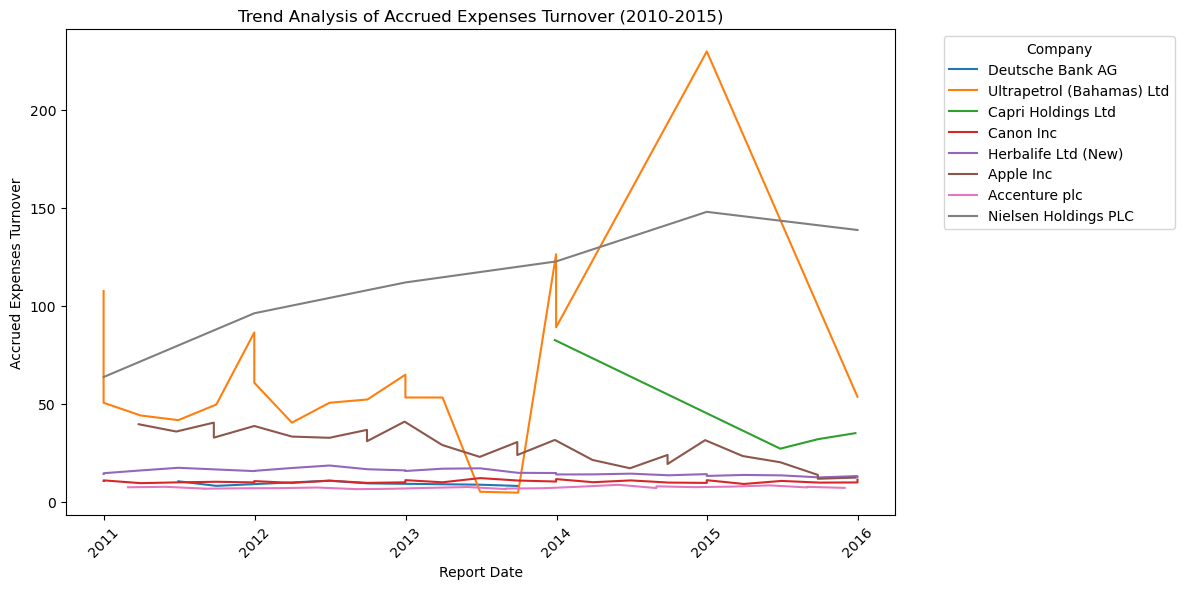

In [13]:
# # Filter for the time period 2010 to 2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

# Selecting relevant columns. Assuming 'company_name' is the column with company names.
# Replace 'company_name', 'reportdate', and 'metric_value_column' with actual column names.
relevant_data = updated_df[['company_name', 'report_date', 'amount']].copy()

# Plotting the trend
plt.figure(figsize=(12, 6))

for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)

plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The graph displays each company's financial efficiency, with lines representing how frequently they were able to pay off their accrued expenses during a six-year period. While some firms have huge fluctuations, such as UltraPetrol (Bahamas) with a big rise in 2014, others, such as Apple Inc and Accenture plc, exhibit more consistent tendencies. This graphic allows us to compare and assess the companies' financial practices and efficiency in handling short-term liabilities over the years studied.

## Geographical Region Analysis

We are now shifting our focus to analyzing data by geographical region. This entails grouping data to determine how different regions contribute to the financial indicators.

Understanding the performance of various geographic locations and stock exchanges is critical for global financial analysis. It allows us to determine which regions are operating well and which may require additional attention or investment. 

+ **`Geographical Region Analysis`**: Grouping data by country and calculating metrics such as the average financial amount enables a deep understanding of regional performance, highlighting disparities and trends across different markets. This method is essential in global financial analysis, offering insights into each region's economic impact and guiding strategic business decisions and resource allocation based on regional strengths and weaknesses

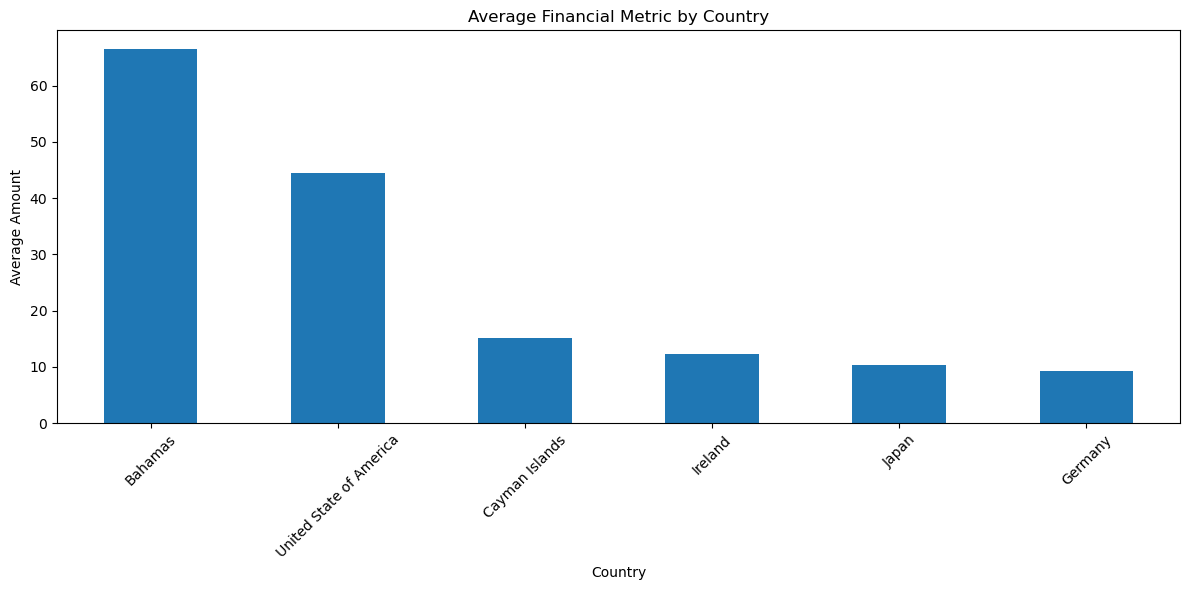

In [14]:
country_avg = updated_df.groupby('country_name')['amount'].mean()


# Plotting for Geographical Region Analysis

plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph examine how different regions contribute to the financial metrics of companies. The country Bahamas has the highest average amount while Germany is the lowest by country.